# This Notebook

In this notebook, we'll train a basic dense fully connected MLP as a baseline for our image classification.

# Importing Images

Let's set up some generators, since we won't be able to load all the images into memory, accessing the file structure built in the preprocessing notebook.

In [1]:
import datetime
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
image_root_dir = 'E:\LargeDatasets\SAR-Ocean-Images\GeoTIFF\OrganisationForModel'
train_dir = f'{image_root_dir}\\train'
val_dir = f'{image_root_dir}\\val'
test_dir = f'{image_root_dir}\\test'

The batch size here I determined to be the largest amount of images I can fit in my computers memory at one time, since it feels very complicated to use a generator and pre-process the images in the way necessary for a basic MLP input layer (Turn pixel array into 1D array). Then, we take one iteration from the generator using next() and process this for input as train, val and test sets.

In [3]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(540, 490), batch_size = 100) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(540, 490), batch_size = 800)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(540, 490), batch_size=8000)

C:\Users\mattl\anaconda3\envs\learn-env\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3756 images belonging to 10 classes.
Found 3756 images belonging to 10 classes.
Found 30041 images belonging to 10 classes.


# Processing for MLP Input

In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 8000
Number of testing samples: 100
Number of validation samples: 800
train_images shape: (8000, 540, 490, 3)
train_labels shape: (8000, 10)
test_images shape: (100, 540, 490, 3)
test_labels shape: (100, 10)
val_images shape: (800, 540, 490, 3)
val_labels shape: (800, 10)


In [6]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(8000, 793800)
(100, 793800)
(800, 793800)


In [7]:
train_y = np.reshape(train_labels[:,0], (8000,1))
test_y = np.reshape(test_labels[:,0], (100,1))
val_y = np.reshape(val_labels[:,0], (800,1))

# Building Model

Here, even though in this result, we have achieved a really solid accuracy over very few epochs, I must note that the networks success is entirely dependent on the random initialization of wieghts in the network. Often, it does not converge, for an accuracy of zero. Other times it maintains a small accuracy anywhere between 0 and 15%. Only very infrequently does it properly start to recognize patterns in the images that are useful.. and only if I really max out the number of images it can look at by maxing out my computer's memory as I have done presently. The number of layers and number of nodes in each layer could be tested further to improve convergence and stability, however, since this network is a baseline for CNNs, I do not feel the need to press further as the achieved accuracy is beyond expectation by a large margin anyway.

In [12]:
model = models.Sequential()
model.add(layers.Dense(1000, activation='relu', input_shape=(793800,)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_img,
                    train_y,
                    epochs=5,
                    batch_size=100,
                    validation_data=(val_img, val_y))

Epoch 1/5
80/80 [==============================] - 129s 2s/step - loss: 3.0474 - accuracy: 0.8508 - val_loss: 3.3168 - val_accuracy: 0.8550
Epoch 2/5
80/80 [==============================] - 119s 1s/step - loss: 3.1036 - accuracy: 0.8723 - val_loss: 3.3168 - val_accuracy: 0.8550
Epoch 3/5
80/80 [==============================] - 119s 1s/step - loss: 3.1036 - accuracy: 0.8723 - val_loss: 3.3168 - val_accuracy: 0.8550
Epoch 4/5
80/80 [==============================] - 117s 1s/step - loss: 3.1036 - accuracy: 0.8723 - val_loss: 3.3168 - val_accuracy: 0.8550
Epoch 5/5
80/80 [==============================] - 118s 1s/step - loss: 3.1036 - accuracy: 0.8723 - val_loss: 3.3168 - val_accuracy: 0.8550


In [14]:
results_train = model.evaluate(train_img, train_y)

250/250 [==============================] - 106s 423ms/step - loss: 3.1036 - accuracy: 0.8723


In [15]:
results_test = model.evaluate(test_img, test_y)

4/4 [==============================] - 1s 178ms/step - loss: 3.6257 - accuracy: 0.8300


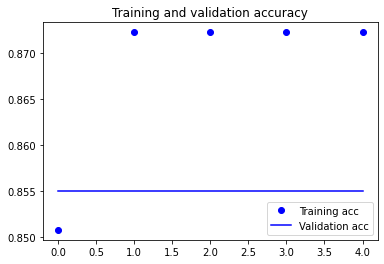

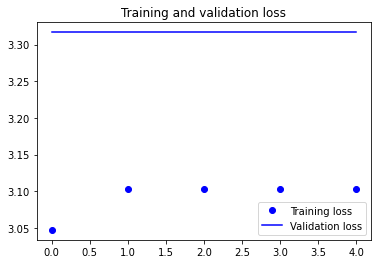

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Testing Understanding of Saving and Reloading Models

In [21]:
os.mkdir('SavedModels')

In [43]:
model.save('.\SavedModels\BaselineMLP', overwrite = True)

INFO:tensorflow:Assets written to: .\SavedModels\BaselineMLP\assets


In [2]:
test = models.load_model('.\SavedModels\BaselineMLP')

ResourceExhaustedError: OOM when allocating tensor with shape[793800,1000] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add]

In [45]:
test.evaluate(test_img, test_y)

4/4 [==============================] - 1s 187ms/step - loss: 3.6257 - accuracy: 1.0000


[3.625703811645508, 1.0]

In [32]:
model.evaluate(test_img, test_y)

4/4 [==============================] - 1s 230ms/step - loss: 3.6257 - accuracy: 0.8300


[3.625703811645508, 0.8299999833106995]

Okay, I am getting a very strange result. Why do I all of a sudden get an accuracy of 1.0?? Let's do some comparisons based on suggestions in this [thread](https://github.com/keras-team/keras/issues/4875).

In [34]:
test.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              793801000 
_________________________________________________________________
dense_7 (Dense)              (None, 200)               200200    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 794,003,210
Trainable params: 794,003,210
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              793801000 
_________________________________________________________________
dense_7 (Dense)              (None, 200)               200200    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 794,003,210
Trainable params: 794,003,210
Non-trainable params: 0
_________________________________________________________________


In [39]:
test.weights[0]

<tf.Variable 'dense_6/kernel:0' shape=(793800, 1000) dtype=float32, numpy=
array([[ 1.8054952e-03,  5.0448277e-04,  2.9764161e-04, ...,
        -1.7655678e-03, -1.3915773e-03, -2.1946286e-03],
       [ 2.0716309e-03,  9.8874676e-04,  1.6160856e-03, ...,
        -2.6015539e-03, -1.2332891e-03,  1.7200515e-03],
       [ 1.1351532e-03, -1.3860001e-03, -2.4173937e-03, ...,
        -2.6394147e-04,  2.6250025e-05, -2.3957628e-03],
       ...,
       [ 2.2395765e-03, -4.9922313e-04, -8.8690722e-04, ...,
         1.7798601e-03,  9.7904843e-04,  2.5542008e-03],
       [-2.0869833e-03, -2.1965518e-03, -1.7638109e-03, ...,
         7.1158865e-05,  1.5134567e-03,  2.0027247e-03],
       [-1.6891693e-03,  1.7482748e-03, -2.3235867e-03, ...,
        -5.3268927e-04, -2.5978175e-03,  3.7841359e-04]], dtype=float32)>

In [38]:
model.weights[0]

<tf.Variable 'dense_6/kernel:0' shape=(793800, 1000) dtype=float32, numpy=
array([[ 1.8054952e-03,  5.0448277e-04,  2.9764161e-04, ...,
        -1.7655678e-03, -1.3915773e-03, -2.1946286e-03],
       [ 2.0716309e-03,  9.8874676e-04,  1.6160856e-03, ...,
        -2.6015539e-03, -1.2332891e-03,  1.7200515e-03],
       [ 1.1351532e-03, -1.3860001e-03, -2.4173937e-03, ...,
        -2.6394147e-04,  2.6250025e-05, -2.3957628e-03],
       ...,
       [ 2.2395765e-03, -4.9922313e-04, -8.8690722e-04, ...,
         1.7798601e-03,  9.7904843e-04,  2.5542008e-03],
       [-2.0869833e-03, -2.1965518e-03, -1.7638109e-03, ...,
         7.1158865e-05,  1.5134567e-03,  2.0027247e-03],
       [-1.6891693e-03,  1.7482748e-03, -2.3235867e-03, ...,
        -5.3268927e-04, -2.5978175e-03,  3.7841359e-04]], dtype=float32)>

Still reading from the thread.. most problems seem to be related to more complicated architectures... weights and architecture of our model seem to be the same.

In [40]:
test.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
test.evaluate(test_img, test_y)

4/4 [==============================] - 1s 171ms/step - loss: 3.6257 - accuracy: 0.8300


[3.625703811645508, 0.8299999833106995]

In [42]:
test.evaluate(train_img, train_y)

250/250 [==============================] - 91s 362ms/step - loss: 3.1036 - accuracy: 0.8723


[3.103602409362793, 0.8722500205039978]

Okay! Finally, near the bottom of a 3 year plus old thread, I indirectly realized that I needed to recompile the loaded model. Why, I am not sure. But let's move on to the CNN notebook.